## Analysis of spatial expression data

The gene expression matrices have already undergone preprocessing and normalisation.
Therefore, we do the following analysis steps:

- Dimensionality reduction, clustering and visualisation
- Identification of highly variable genes


Select dataset - can be one of `dataset_1`, `dataset_2`, `dataset_3`

In [1]:
%matplotlib inline 
dataset = 'dataset3'

Module imports

In [2]:
import scanpy as sc
import phenograph
import numpy as np
import pandas as pd

Data import

In [3]:
# Gene expression matrix
gex_res = pd.read_csv(f'../reproduce_data/{dataset}/gex_res.csv', index_col=0)
tensionmap_data = pd.read_csv(f'../reproduce_data/{dataset}/tensionmap_res.csv', index_col=0)

Dimensionality reduction and visualisation

In [4]:
# Convert data to AnnData format
adata = sc.AnnData(gex_res.T)
adata.obs['celltype'] = tensionmap_data['celltype'].values

In [5]:
# PCA and UMAP
sc.tl.pca(adata, svd_solver='arpack')
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=30)
sc.tl.umap(adata)

/Users/rhe/.conda/envs/tensionmap/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


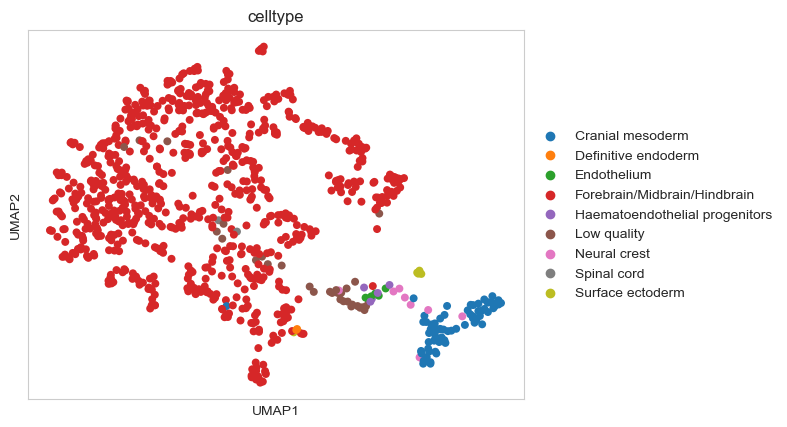

In [6]:
# Visualise UMAP coloured by celltype annotations from Lohoff et al., 2022

sc.pl.umap(adata, color='celltype')

Clustering with Phenograph

In [7]:
gex_labels,_,_ = phenograph.cluster(pd.DataFrame(adata.obsm['X_pca']))
adata.obs['phenograph_clusters'] = pd.Categorical(gex_labels)

Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 0.8269960880279541 seconds
Jaccard graph constructed in 20.9721097946167 seconds
Wrote graph to binary file in 0.19510316848754883 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.791455
After 5 runs, maximum modularity is Q = 0.794926
Louvain completed 25 runs in 3.1273491382598877 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 39.740768909454346 seconds


/Users/rhe/.conda/envs/tensionmap/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


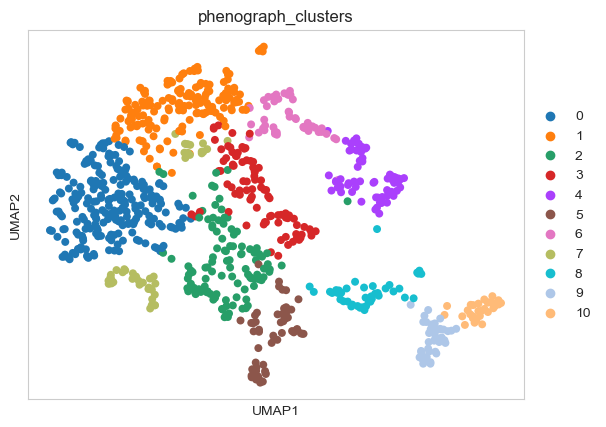

In [8]:
sc.pl.umap(adata, color='phenograph_clusters')

Select highly variable genes

In [9]:
sc.pp.filter_genes(adata, min_cells = (tensionmap_data.shape[0]/2))
sc.pp.highly_variable_genes(adata, inplace=True, n_top_genes=3000, flavor='seurat_v3', check_values=False)
var_genes = adata.var.loc[adata.var['highly_variable']].index.values

In [10]:
# Save list of highly variable genes - this will be required in later step

np.savetxt(f'./temp_data/highly_variable.txt', var_genes, fmt='%s')